In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [2]:
pip install umap

Note: you may need to restart the kernel to use updated packages.


In [3]:
os.listdir("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/brain_tumor_dataset/data")

['no', 'yes']

In [4]:
im =Image.open("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/New folder (2)/Brain-Tumor-Detection-with-Multiple-Neural-Networks-main\Brain Tumor Dataset/no/1 no.jpeg").resize((128,128))

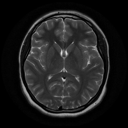

In [5]:
im

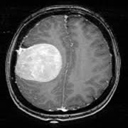

In [6]:
im =Image.open("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/brain_tumor_dataset/data/yes/Y1.jpg").resize((128,128))
im

In [7]:
yes=os.listdir("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/brain_tumor_dataset/data/yes")
no=os.listdir("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/New folder (2)/Brain-Tumor-Detection-with-Multiple-Neural-Networks-main\Brain Tumor Dataset/no")

In [8]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)
print(len(data))
print(len(yes))

253
155


In [9]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [10]:
len(data_target)==len(data)

True

In [11]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
data

array(['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg',
       'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg',
       'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG',
       'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG',
       'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG',
       'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg',
       'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG',
       'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG',
       'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg',
       'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg',
       'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg',
       'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG',
       'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg',
       'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG',
       'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG',
  

In [13]:
yes_values=os.listdir("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/brain_tumor_dataset/data/yes")
no_values=os.listdir("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/New folder (2)/Brain-Tumor-Detection-with-Multiple-Neural-Networks-main\Brain Tumor Dataset/no")

In [14]:
print(yes_values)

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg', 'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG', 'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG', 'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG', 'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg', 'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG', 'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG', 'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg', 'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg', 'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg', 'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG', 'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg', 'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG', 'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG', 'Y249.JPG', 'Y25.jpg', 'Y250.jpg', 'Y251.JPG', 'Y252.jpg', 'Y253.JPG', 'Y254.jpg', 'Y255.JPG', 'Y256.JPG',

In [15]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/brain_tumor_dataset/data/yes/"+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [16]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread("C:/Users/bacem/OneDrive - Ministere de l'Enseignement Superieur et de la Recherche Scientifique/Bureau/New folder (2)/Brain-Tumor-Detection-with-Multiple-Neural-Networks-main\Brain Tumor Dataset/no/"+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [17]:
len(X_data)==len(data)==len(data_target)

True

In [18]:
X = np.squeeze(X_data)
print(X)

[[[[ 3  3  3]
   [ 2  2  2]
   [ 2  2  2]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 2  2  2]]

  [[ 3  3  3]
   [ 0  0  0]
   [ 4  4  4]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 1  1  1]]

  [[ 5  5  5]
   [ 8  8  8]
   [ 6  6  6]
   ...
   [ 6  6  6]
   [ 5  5  5]
   [ 3  3  3]]

  ...

  [[ 2  2  2]
   [ 4  4  4]
   [ 4  4  4]
   ...
   [ 3  3  3]
   [ 5  5  5]
   [ 3  3  3]]

  [[ 2  2  2]
   [ 3  3  3]
   [ 3  3  3]
   ...
   [ 3  3  3]
   [ 3  3  3]
   [ 3  3  3]]

  [[ 2  2  2]
   [ 2  2  2]
   [ 2  2  2]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 2  2  2]]]


 [[[23 23 23]
   [29 29 29]
   [29 29 29]
   ...
   [24 24 24]
   [25 25 25]
   [23 23 23]]

  [[32 32 32]
   [27 27 27]
   [27 27 27]
   ...
   [23 23 23]
   [27 27 27]
   [28 28 28]]

  [[32 32 32]
   [27 27 27]
   [27 27 27]
   ...
   [23 23 23]
   [23 23 23]
   [28 28 28]]

  ...

  [[28 28 28]
   [27 27 27]
   [27 27 27]
   ...
   [23 23 23]
   [25 25 25]
   [28 28 28]]

  [[28 28 28]
   [27 27 27]
   [27 27 27]
   ...
   [2

In [19]:
X.shape

(253, 32, 32, 3)

In [20]:
# normalize data
X = X.astype('float32')
X /= 255
print(X)

[[[[0.01176471 0.01176471 0.01176471]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]]

  [[0.01176471 0.01176471 0.01176471]
   [0.         0.         0.        ]
   [0.01568628 0.01568628 0.01568628]
   ...
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00392157 0.00392157 0.00392157]]

  [[0.01960784 0.01960784 0.01960784]
   [0.03137255 0.03137255 0.03137255]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.02352941 0.02352941 0.02352941]
   [0.01960784 0.01960784 0.01960784]
   [0.01176471 0.01176471 0.01176471]]

  ...

  [[0.00784314 0.00784314 0.00784314]
   [0.01568628 0.01568628 0.01568628]
   [0.01568628 0.01568628 0.01568628]
   ...
   [0.01176471 0.01176471 0.01176471]
   [0.01960784 0.01960784 0.01960784]
   [0.01176471 0.01176471 0.01176471]]

  [[0.00784314 0.00784314 0.00784314]
   [0.0

In [21]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [23]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [25]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [26]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 2s 1s/step - loss: 0.6444 - acc: 0.6243 - val_loss: 1.3829 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 133ms/step - loss: 0.4479 - acc: 0.8303 - val_loss: 0.8851 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 133ms/step - loss: 0.5051 - acc: 0.8173 - val_loss: 0.8924 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 135ms/step - loss: 0.4886 - acc: 0.8225 - val_loss: 1.1900 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 140ms/step - loss: 0.4754 - acc: 0.8043 - val_loss: 1.3110 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 137ms/step - loss: 0.4809 - acc: 0.8147 - val_loss: 1.0662 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 137ms/step - loss: 0.4620 - acc: 0.8069 - val_loss: 0.9437 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 0s 150m

Epoch 124/150
2/2 [==============================] - 0s 144ms/step - loss: 0.0289 - acc: 0.9834 - val_loss: 1.7601 - val_acc: 0.7302
Epoch 125/150
2/2 [==============================] - 0s 140ms/step - loss: 0.0392 - acc: 0.9843 - val_loss: 1.8791 - val_acc: 0.7143
Epoch 126/150
2/2 [==============================] - 0s 141ms/step - loss: 0.0333 - acc: 0.9817 - val_loss: 2.6481 - val_acc: 0.6190
Epoch 127/150
2/2 [==============================] - 0s 140ms/step - loss: 0.0318 - acc: 0.9869 - val_loss: 2.6829 - val_acc: 0.5873
Epoch 128/150
2/2 [==============================] - 0s 145ms/step - loss: 0.0324 - acc: 0.9843 - val_loss: 2.0917 - val_acc: 0.7143
Epoch 129/150
2/2 [==============================] - 0s 142ms/step - loss: 0.0269 - acc: 0.9869 - val_loss: 1.8664 - val_acc: 0.7302
Epoch 130/150
2/2 [==============================] - 0s 143ms/step - loss: 0.0537 - acc: 0.9694 - val_loss: 2.6500 - val_acc: 0.6190
Epoch 131/150
2/2 [==============================] - 0s 145ms/step - 

In [27]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.682539701461792


In [38]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

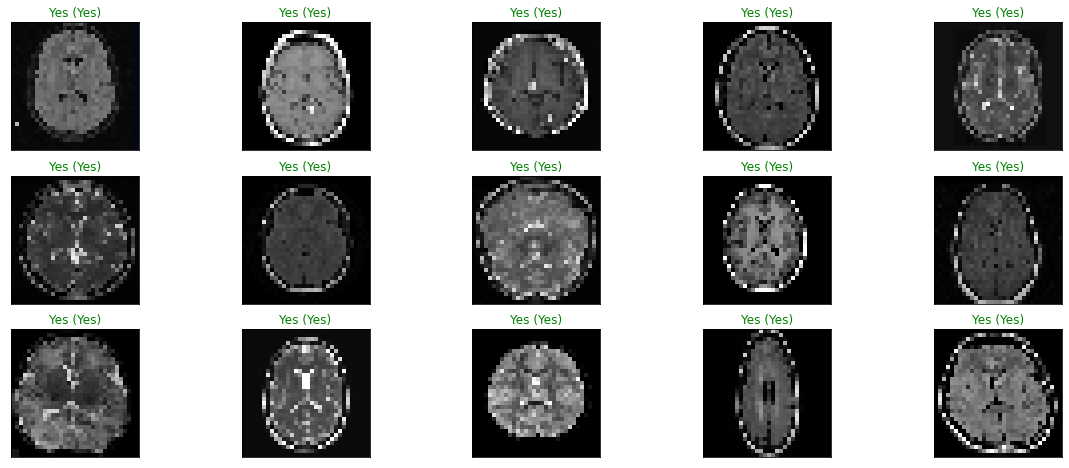

In [39]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

# Xplainable AI 

In [40]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283850 sha256=abc172ee0b0b631cdec9af824324c9ddea9889edbd2238a623d7ec7a04259d04
  Stored in directory: c:\users\bacem\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [41]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

In [1]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         x_train, 
         y_hat
)
plt.imshow(x_train)


NameError: name 'lime_image' is not defined

In [28]:
print('LIME stability:        ', l.get_lime_stability())
print('LIME local_concordance:', l.get_lime_local_concordance())
print('LIME fidelity:         ', l.get_lime_fidelity())
print('LIME prescriptivity:   ', l.get_lime_prescriptivity())
print()

NameError: name 'l' is not defined